<a href="https://colab.research.google.com/github/sid111nov/LoanDefaultProject/blob/main/Loan_Default_DL_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow

In [ ]:
#%pip install -q mlflow databricks-sdk

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np

import mlflow

import pickle
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.callbacks import EarlyStopping

from imblearn.over_sampling import ADASYN
from sklearn.impute import SimpleImputer, KNNImputer

from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
#mlflow.login()

In [ ]:
df = pd.read_csv('./sample_data/Loan_Default.csv')

In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


## Splitting Dataset

In [ ]:
Y=df['Status']
X=df.drop(columns=['Status','ID'])
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((104069, 32), (44601, 32), (104069,), (44601,))

##Imputation

In [ ]:
categorical_columns = X_train.select_dtypes(include='object').columns
numerical_columns = X_train.select_dtypes(exclude='object').columns

categorical_columns, numerical_columns

(Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
        'Credit_Worthiness', 'open_credit', 'business_or_commercial',
        'Neg_ammortization', 'interest_only', 'lump_sum_payment',
        'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
        'credit_type', 'co-applicant_credit_type', 'age',
        'submission_of_application', 'Region', 'Security_Type'],
       dtype='object'),
 Index(['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
        'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
        'LTV', 'dtir1'],
       dtype='object'))

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_columns] = cat_imputer.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = cat_imputer.transform(X_test[categorical_columns])

In [ ]:
imputer = KNNImputer(n_neighbors=4)
X_train[numerical_columns] = imputer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = imputer.transform(X_test[numerical_columns])

In [ ]:
X_train.isna().sum(), X_test.isna().sum()

(year                         0
 loan_limit                   0
 Gender                       0
 approv_in_adv                0
 loan_type                    0
 loan_purpose                 0
 Credit_Worthiness            0
 open_credit                  0
 business_or_commercial       0
 loan_amount                  0
 rate_of_interest             0
 Interest_rate_spread         0
 Upfront_charges              0
 term                         0
 Neg_ammortization            0
 interest_only                0
 lump_sum_payment             0
 property_value               0
 construction_type            0
 occupancy_type               0
 Secured_by                   0
 total_units                  0
 income                       0
 credit_type                  0
 Credit_Score                 0
 co-applicant_credit_type     0
 age                          0
 submission_of_application    0
 LTV                          0
 Region                       0
 Security_Type                0
 dtir1  

In [ ]:
## Save imputer pickle file
imputers= {
    'SimpleImputer': cat_imputer,
    'KNNImputer': imputer

}


with open('./sample_data/imputers.pickle', 'wb') as f:
    pickle.dump(imputers, f)

## Encoding

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((104069, 32), (44601, 32), (104069,), (44601,))

In [ ]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((104069, 32), (44601, 32), (104069,), (44601,))

In [ ]:

A_train = X_train.copy()
A_test = X_test.copy()
B_train = Y_train.copy()
B_test = Y_test.copy()

In [94]:
ohencoders={}

for column in categorical_columns:
  encoder = OneHotEncoder(sparse=False)
  encoded_column = encoder.fit_transform(A_train[[column]])

  column_df = pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out(),index=A_train.index)

  ohencoders[column] = encoder

  A_train = pd.concat([A_train, column_df], axis=1)
  A_train.drop(columns=[column], inplace=True)

  train_array = encoder.transform(A_test[[column]])

  test_df = pd.DataFrame(train_array, columns=encoder.get_feature_names_out(),index=A_test.index)

  A_test = pd.concat([A_test, test_df], axis=1)
  A_test.drop(columns=[column], inplace=True)

A_train.shape, A_test.shape, B_train.shape, B_test.shape



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

((104069, 70), (44601, 70), (104069,), (44601,))

In [95]:
ohencoders

{'loan_limit': OneHotEncoder(sparse=False, sparse_output=False),
 'Gender': OneHotEncoder(sparse=False, sparse_output=False),
 'approv_in_adv': OneHotEncoder(sparse=False, sparse_output=False),
 'loan_type': OneHotEncoder(sparse=False, sparse_output=False),
 'loan_purpose': OneHotEncoder(sparse=False, sparse_output=False),
 'Credit_Worthiness': OneHotEncoder(sparse=False, sparse_output=False),
 'open_credit': OneHotEncoder(sparse=False, sparse_output=False),
 'business_or_commercial': OneHotEncoder(sparse=False, sparse_output=False),
 'Neg_ammortization': OneHotEncoder(sparse=False, sparse_output=False),
 'interest_only': OneHotEncoder(sparse=False, sparse_output=False),
 'lump_sum_payment': OneHotEncoder(sparse=False, sparse_output=False),
 'construction_type': OneHotEncoder(sparse=False, sparse_output=False),
 'occupancy_type': OneHotEncoder(sparse=False, sparse_output=False),
 'Secured_by': OneHotEncoder(sparse=False, sparse_output=False),
 'total_units': OneHotEncoder(sparse=False,

In [104]:
encoders= {
    'scaler': scaler,
    'ohencoders': ohencoders

}

with open('./sample_data/encoders.pickle', 'wb') as f:
    pickle.dump(encoders, f)

In [97]:
X_train = A_train
X_test = A_test
Y_train = B_train
Y_test = B_test

In [98]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((104069, 70), (44601, 70), (104069,), (44601,))

# **Under - Sampling**

<Axes: xlabel='Status'>

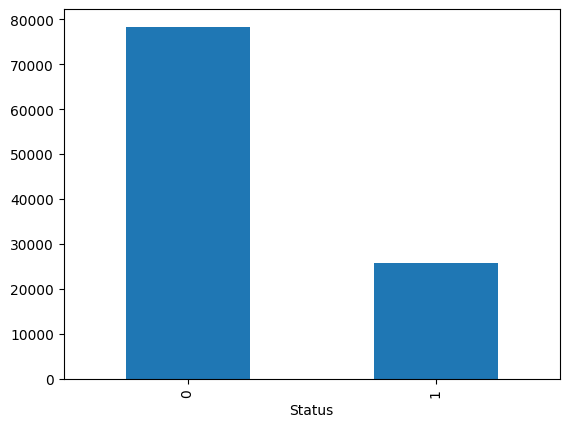

In [99]:
Y_train.value_counts().plot(kind='bar')

In [100]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_res, Y_train_res = rus.fit_resample(X_train, Y_train)

<Axes: xlabel='Status'>

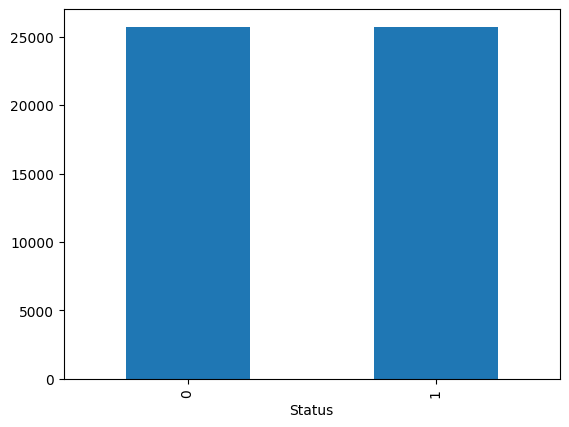

In [101]:
Y_train_res.value_counts().plot(kind='bar')

In [ ]:
#mlflow.set_experiment("/Users/siddharth111nov@gmail.com/Loan Default DL")

In [102]:
X_train_res.shape, X_test.shape, Y_train_res.shape, Y_test.shape

((51450, 70), (44601, 70), (51450,), (44601,))

In [103]:
#with mlflow.start_run():
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=losses.BinaryCrossentropy(), metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss',patience=50,min_delta=0.001,mode='min')

history = model.fit(X_train_res,Y_train_res,epochs=500,validation_data=(X_test,Y_test),callbacks=[early_stopping],verbose=1)

# model.summary =[]
# model.summary(print_fn=lambda x: mlflow.log_text(x, "model_summary.txt"))

hyperparameters = {
  "optimizer": model.optimizer.__class__.__name__,
  "loss": model.loss.__class__.__name__,
  "activation": [layer.activation.__name__ for layer in model.layers if hasattr(layer, "activation")],

}

#mlflow.log_params(hyperparameters)

history_dict=history.history

print(history_dict['accuracy'])
print(history_dict['val_accuracy'])
print(history_dict['loss'])
print(history_dict['val_loss'])

# mlflow.log_metric("accuracy",history_dict['accuracy'][-1])
# mlflow.log_metric("val_accuracy",history_dict['val_accuracy'][-1])
# mlflow.log_metric("loss",history_dict['loss'][-1])
# mlflow.log_metric("val_loss",history_dict['val_loss'][-1])

# mlflow.keras.log_model(model, "model")

model.save("./sample_data/model.h5")
# mlflow.log_artifact("model.h5")

# mlflow.log_artifact("imputers.pickle")
# mlflow.log_artifact("encoder.pickle")


# for layer in model.layers:
#   if isinstance(layer, tf.keras.layers.Dropout):
#       mlflow.log_param(f"dropout_rate_{layer.name}", layer.rate)






Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7815 - loss: 0.4447 - val_accuracy: 0.9068 - val_loss: 0.2416
Epoch 2/500
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8742 - loss: 0.2799 - val_accuracy: 0.9084 - val_loss: 0.2361
Epoch 3/500
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.2589 - val_accuracy: 0.9205 - val_loss: 0.2179
Epoch 4/500
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8941 - loss: 0.2436 - val_accuracy: 0.9183 - val_loss: 0.2223
Epoch 5/500
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8979 - loss: 0.2346 - val_accuracy: 0.9034 - val_loss: 0.2584
Epoch 6/500
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8994 - loss: 0.2319 - val_accuracy: 0.9081 - val_loss: 0.2454
Epoch 7/500
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9027 - loss: 0.2251 - val_accuracy: 0.9100 - val_loss: 0.2427
Epoch 8/500
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9043 - loss: 0.2202 - val_

[0.8313897252082825, 0.8786394596099854, 0.8874247074127197, 0.8927502632141113, 0.8954130411148071, 0.8987172245979309, 0.9018464684486389, 0.9030320644378662, 0.9040816426277161, 0.9059280753135681, 0.9071720242500305, 0.9064723253250122, 0.9079883098602295, 0.9082993268966675, 0.9099125266075134, 0.911078691482544, 0.9104762077331543, 0.9130417704582214, 0.9119922518730164, 0.912108838558197, 0.913080632686615, 0.911953330039978, 0.9131972789764404, 0.9128279685974121, 0.9153352975845337, 0.914363443851471, 0.915393590927124, 0.9141107797622681, 0.915723979473114, 0.916365385055542, 0.9164237380027771, 0.916190505027771, 0.9153741598129272, 0.9162099361419678, 0.9172983765602112, 0.9164042472839355, 0.9169873595237732, 0.9174343943595886, 0.9174149632453918, 0.9178231358528137, 0.9170456528663635, 0.9179592132568359, 0.9171040058135986, 0.920136034488678, 0.9172400236129761, 0.9182118773460388, 0.9179980754852295, 0.9182507395744324, 0.9183478951454163, 0.9183867573738098, 0.9186199